# Ensemble Learning and Random Forest

## Introduction

 The ensemble method amalgamates several individual models to enhance the overall performance of the algorithm, resulting in more consistent and precise predictions. It is applicable to both regression and classification tasks. Ensemble learning operates under the assumption that all predictions are entirely independent.

#### One of simple ensemble learning techniques - Hard Voting Classifier

For classification tasks, a straightforward approach involves employing a "Hard Voting Classifier," where multiple models contribute to predictions for each data point. Each model's prediction is treated as an individual vote, and the final prediction is determined by the majority consensus among the models.

<img src="Image/hard-voting-classifier.png" alt="Drawing" style="width: 500px;"/>


Besides Hard voting classifier, the averaging and weighted averaging techniques are also used in the ensemble learning. 

#### Bagging (Bootstrap Aggregation)

Bagging serves to mitigate the variance of a decision tree. It involves sampling multiple subsets from the original dataset, with observations potentially being selected more than once. Each subset is used to train a decision tree model, and their predictions are aggregated. Similar to the hard voting classifier, the bagged algorithm identifies the class with the most votes as the final prediction.

While each individual learner may exhibit a higher bias compared to one trained on the original dataset, the aggregation of learners effectively diminishes both bias and variance.

### Random Forest

Random Forest stands out as a widely used ensemble learning approach, representing an advancement beyond bagging methods.

In the realm of nature, a gathering of trees forms a forest. In a similar fashion, Random Forest utilizes an ensemble of decision trees. This technique involves creating numerous subsets from the training data and training them using a set of decision tree classifiers to produce predictions based on diverse portions of the training dataset. Each tree contributes its prediction, and the final prediction is determined by the majority of these votes.

<img src="Image/random-forest-classifier.jpeg" alt="Drawing" style="width: 500px;"/>


Random Forest employs a strategy of randomly selecting features to determine where to split. This approach introduces diversity, as each tree makes splits based on different features. This diversity enhances the ensemble, resulting in a more accurate predictor. However, this advantage comes with a trade-off: Random Forest demands more computational resources and time due to its complexity.

---

## Implement

The following notebook implement the ensemble learning algorithms for species classification using the [Penguin dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris). The three ensemble learning models will be used:

* Random forest

* Multilayer Perceptron, Logistic Regression, and Random Forest algorithms will be combined together, and the hard voting classifier will be used to select the final prediction. 

* Multiple decision trees will be constructed using bagging strategy.

* Multiple MLP will be constructed using bagging strategy.

### About the dataset

The dataset consists of 344 rows and 7 columns. There are three different species of penguins: Chinstrap, Adélie, and Gentoo penguins. The columns are:

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

This dataset has previously been utilized in some of the initial algorithms within this repository. In this case, the data undergoes preprocessing steps, such as removing rows containing Na values. Subsequently, "bill_length_mm" and "bill_depth_mm" are chosen as the predictors to distinguish among the three penguin species.

### Objective

Using the length and the depth of the bill to classify the penguins species by the three ensemble learning algorithms, and compare the performances with the individual models.

### Tools

This notebook uses the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org/)
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier), [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=votingclassifier#sklearn.ensemble.VotingClassifier), and [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=baggingclassifier#sklearn.ensemble.BaggingClassifier) in [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) in [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier) in [sklearn.neural_network](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network)
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) in [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score) in [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Import the tool form sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

---

### Pre-Processing

Before implementing the algorithm, we pre-process the data and plot the scatter plot to have broader understanding of the data distribution.

In [2]:
# Import Penguins dataset
penguins = pd.read_csv("Data/penguins.csv")

# Remove the rows with NaN values from the dataset

penguins = penguins.dropna()

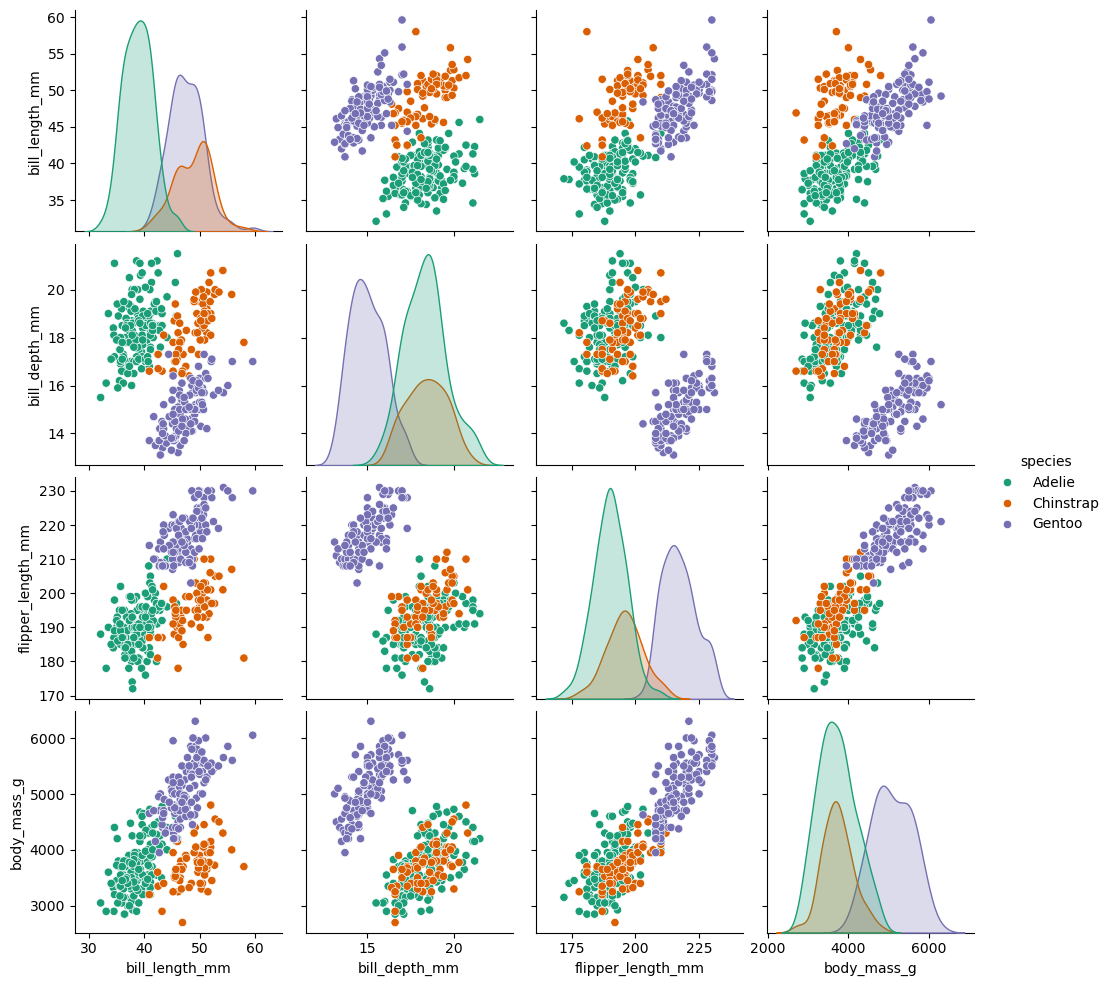

In [3]:
sns.pairplot(penguins, hue='species',palette='Dark2')

# plt.show(sns)

Text(0.5, 1.0, 'Penguins Data')

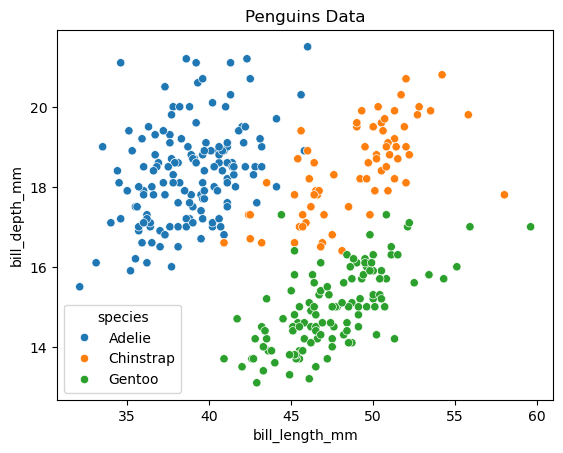

In [4]:
sns.scatterplot(data = penguins, x = "bill_length_mm", y = "bill_depth_mm", hue = 'species').set_title("Penguins Data")
# plt.show()

Scatter plot above suggests that "bill_length_mm" and "bill_depth_mm", are the good predictors of three penguin species.

In [5]:
# Extract features from Penguins Dataset, and convert to numpy array
X = penguins[['bill_length_mm', 'bill_depth_mm']].to_numpy()

# Extract out labels, and convert labels to numpy array
y = penguins['species'].to_numpy()

# Change labels to numeric labels
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0
        
# Change the type of y to meet the needs of the usage of models
y = y.tolist()

## Split into Train and Test data
To implement Sklearn's Random Forest classifier, split the data into "training" and "test" data.

In [6]:
# Use the train_test_split function in sklearn package
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 20)

In [7]:
# Train the training set
clf = RandomForestClassifier(random_state=10)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [8]:
# Predict the test data and calculate the accuracy
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9552238805970149


Random forest has accuracy of 0.96 on the test data which is good. 

Next, compare the random forest outcome with the decision tree outcomes. 

In [9]:
# Set up the decision tree and train the training set
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [10]:
# Predict the test data and calculate the accuracy
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9402985074626866



The random forest exhibits a slight performance advantage over the decision tree when tested with the data. Consequently, within our context, the random forest demonstrates superior performance compared to the decision tree.

Nevertheless, our focus lies on assessing the predictive capability of the random forest when integrated with other prediction models.
 
---

### Ensemble learning 2

n the coming section, the Random Forest model is merged with a Multilayer Perceptron and Logistic Regression. A hard voting classifier approach is then employed to determine the optimal prediction algorithm. The predictive performance of each individual model is assessed within the ensemble model framework.

We use following algorithms from the [sklearn](https://scikit-learn.org) library:

1. RandomForest
2. Logistic Regression 
3. MLPCLassifier 
4. and VotingClassifier to select the algorithm 

In [11]:
# Set up ensemble learners with hard voting classifier
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')

In [12]:
# Train the training set
voting_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

Compare the prediction accuracy of the three individual models and the ensemble model.

In [13]:
# Fit 3 models and the ensemble model, and print the accuracy
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')    

LogisticRegression, accuracy score = 0.9477611940298507
MLPClassifier, accuracy score = 0.8955223880597015
RandomForestClassifier, accuracy score = 0.9552238805970149


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier, accuracy score = 0.9402985074626866




In our scenario, the ensemble model using a hard voting classifier displays a slightly lower accuracy compared to the Random Forest method alone. Consequently, in our specific case, the ensemble method performs less effectively than the individual Random Forest approach.

---


#### Ensemble learning 2

The following part uses multiple decision trees along with bagging strategy.  

In [15]:
# Set up the ensemble model
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [16]:
# Train the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [17]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.9701492537313433

Recall the results of the individual decision tree above, individual decision tree has an accuracy of 0.95 whereas the multiple decision tree has an accuracy of 0.97. Thus, in our context the ensemble model with bagging performs better. 

---

### Ensemble learning 3

In the hard voting classifier approach the MLP has the lowest accuracy among the individual algorithms. Thus, the final part implements MLP with bagging method to evaluates the accuracy of ensemble model with bagging.

In [18]:
# Set up the ensemble model
bag2_clf = BaggingClassifier(MLPClassifier(), 
                             n_estimators=500, 
                             max_samples=100, 
                             bootstrap = True, 
                             n_jobs = -1)

In [19]:
# Train the training set
bag2_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

BaggingClassifier(estimator=MLPClassifier(), max_samples=100, n_estimators=500,
                  n_jobs=-1)

In [20]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.9701492537313433

MLP with bagging has an accuracy of 0.97 which is higher than the accuracy of individual MLP model. 

---

## Conclusion

In our situation, there are instances where individual models outperform the ensemble learning model, and vice versa. However, this pattern tends to occur frequently. Meanwhile, it's worth noting that ensemble learning models typically require more computational resources compared to individual models.